# Correlation between Police Division and Type of Crime

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Image

%matplotlib inline

In [224]:
plt.rcParams["figure.figsize"] = 10, 6
plt.rcParams["figure.dpi"] = 150

In [49]:
df = pd.read_csv("HPD_Crime.csv")

In [159]:
#to_datetime %Y_%m
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
df['datetime'] = pd.to_datetime(df['Srce_YYMM'], format = '%Y_%m')

In [160]:
df['Year'] = [value.year for value in df['datetime']]

In [161]:
df['Month'] = [value.month for value in df['datetime']]

In [162]:
df.head(10)

,Location_Desc,Police_Beat,Street_Type,RecordID,Date_Reported,Offense_Type,Block_Range,Street_Prefix,Street_Name,Num_Offenses,...,GEOID00,Police_Division,CTA_ID,CTA_Name,Geocoded,Location_Code,Hour,datetime,Year,Month
0,NaN,14D40,RD,1,NaN,Burglary,5600-5699,NaN,SELINSKY,1,...,4.820133e+14,Southeast Division,K066,Minnetex,1,NaN,8,2014-06-01,2014,6
1,NaN,7C20,NaN,2,NaN,Theft,3900-3999,NaN,CAVALCADE,1,...,4.820121e+14,Northeast Division,K004,Kashmere Gardens,1,NaN,11,2014-06-01,2014,6
2,NaN,13D40,PKWY,3,NaN,Theft,8500-8599,S,SAM HOUSTON,1,...,4.820133e+14,Southwest Division,K070,Five Corners,1,NaN,15,2014-07-01,2014,7
3,NaN,18F40,RD,4,NaN,Robbery,2700-2799,NaN,DUNVALE,1,...,4.820143e+14,Midwest Division,K080,Mid-West,1,NaN,14,2014-07-01,2014,7
4,RESTAURANT/CAFETERIA,24C60,PKWY,5,09/08/1914,Burglary,12700-12799,W,LAKE HOUSTON,1,...,4.820125e+14,Kingwood Division,K106,Lake Houston,1,210,7,2014-09-01,2014,9
5,MISC. BUSINESS (NON-SPECIFIC),18F60,BLVD,6,11/02/1914,Burglary,8800-8899,NaN,BELLAIRE,1,...,4.820143e+14,Westside Division,K079,Sharpstown,1,05Z,3,2014-10-01,2014,10
6,NaN,12D20,FWY,7,12/03/1914,Auto Theft,12800-12899,NaN,GULF,1,...,4.820133e+14,Clear Lake Division,K117,South Belt / Ellingt,1,NaN,19,2014-12-01,2014,12
7,OTHER PARKING LOT,3B10,NaN,8,01/05/1915,Theft,3200-3299,NaN,MANGUM RD 180,1,...,4.820153e+14,North Division,K032,Oak Forest,1,18O,22,2015-01-01,2015,1
8,APARTMENT PARKING LOT,5F10,DR,9,01/14/1915,Auto Theft,7000-7099,NaN,WESTVIEW,1,...,4.820152e+14,Northwest Division,K083,Spring Branch East,1,18A,23,2015-01-01,2015,1
9,OFFICE BUILDING,1A20,NaN,10,04/24/1915,Burglary,3100-3199,NaN,SMITH,1,...,4.820141e+14,Central Division,K023,Midtown,1,05O,7,2015-04-01,2015,4


In [163]:
print(df.Police_Division.count())
print(df.shape)

1051759
(1094207, 26)


About 40000 entries don't have a valid Police_Division attribute.

Text(0,0.5,'Division')

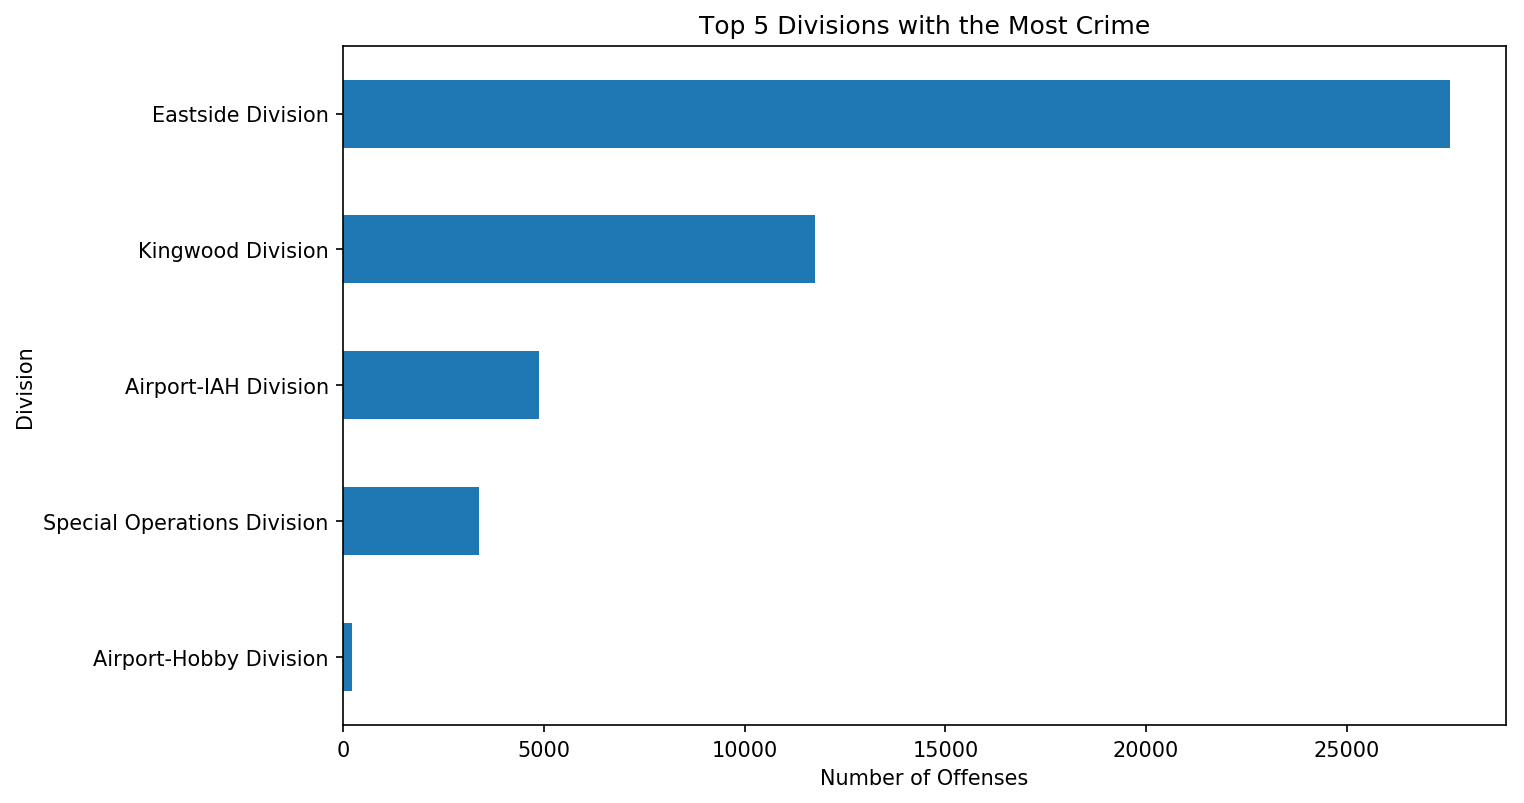

In [233]:
df.Police_Division.value_counts().sort_values(ascending=True).head(5).plot.barh()
plt.title("Top 5 Divisions with the Most Crime");
plt.xlabel("Number of Offenses")
plt.ylabel("Division")

Text(0,0.5,'Type of Crime')

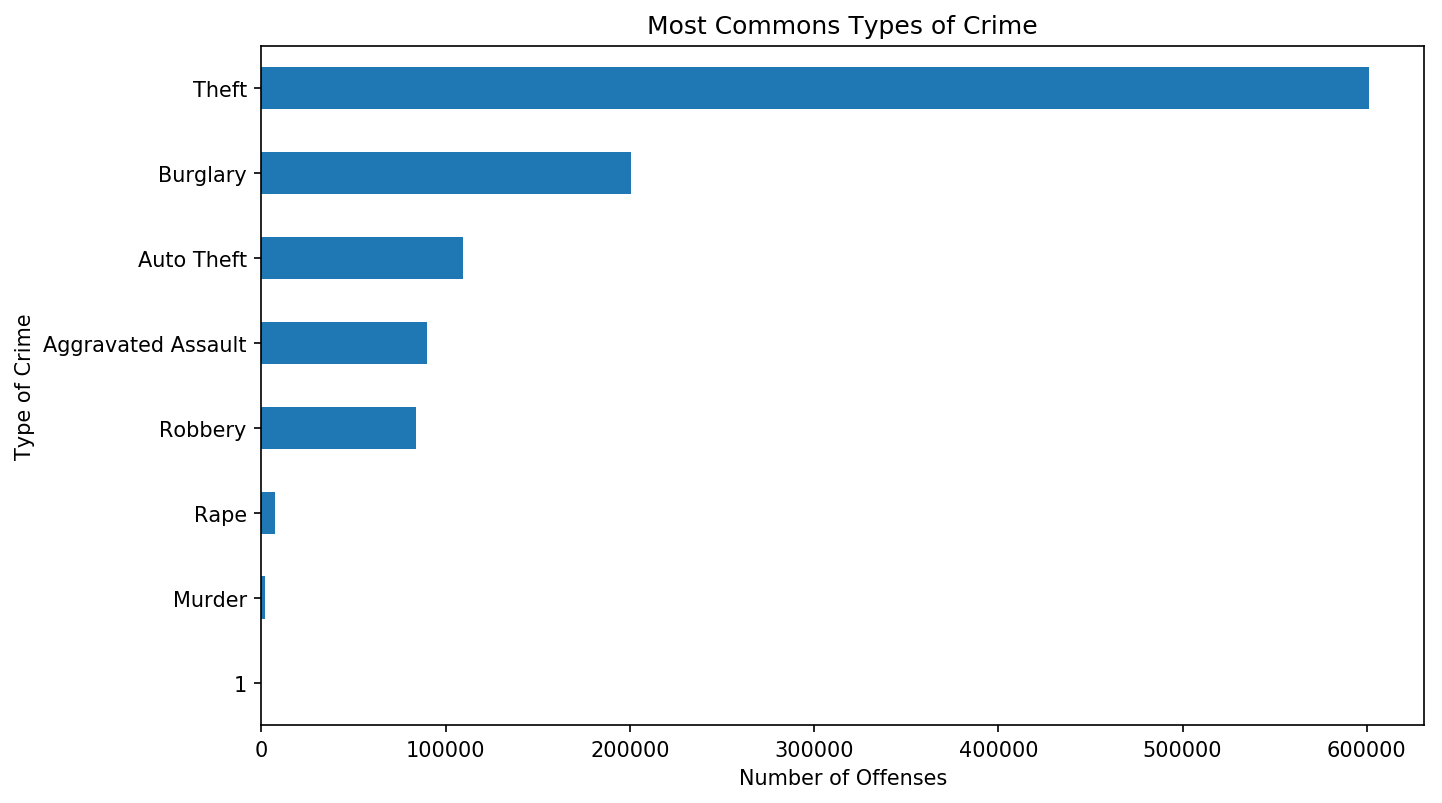

In [226]:
df.Offense_Type.value_counts().sort_values(ascending=True).plot.barh()
plt.title("Most Commons Types of Crime");
plt.xlabel("Number of Offenses")
plt.ylabel("Type of Crime")

In [166]:
df.groupby(['Police_Division', 'Offense_Type']).count()

Location_Desc  Police_Beat  \
Police_Division             Offense_Type                                     
Airport-Hobby Division      Aggravated Assault              7            7   
                            Auto Theft                    102          105   
                            Burglary                       16           17   
                            Robbery                         5            5   
                            Theft                          69           73   
Airport-IAH Division        Aggravated Assault             51           51   
                            Auto Theft                    573          601   
                            Burglary                       49           50   
                            Rape                            3            3   
                            Robbery                        21           20   
                            Theft                        3984         4150   
Central Division            1                               1            0   
                            Aggravated Assault           5292         5509   
                            Auto Theft                   8687         8977   
                            Burglary                    15851        16169   
                            Murder                         90           96   
                            Rape                          520          543   
                            Robbery                      5611         5727   
                            Theft                       85065        88316   
Clear Lake Division         1                               1            2   
                            Aggravated Assault           3124         3228   
                            Auto Theft                   6949         7183   
                            Burglary                     9784         9956   
                            Murder                         49           54   
                            Rape                          324          341   
                            Robbery                      2770         2852   
                            Theft                       34461        35418   
Eastside Division           1                               1            1   
                            Aggravated Assault           2554         2591   
                            Auto Theft                   3551         3660   
...                                                       ...          ...   
Southeast Division          1                               1            1   
                            Aggravated Assault          11492        11770   
                            Auto Theft                   9093         9363   
                            Burglary                    18938        19360   
                            Murder                        302          311   
                            Rape                          728          758   
                            Robbery                      7868         8093   
                            Theft                       38600        39758   
Southwest Division          Aggravated Assault           5050         5269   
                            Auto Theft                   7534         7806   
                            Burglary                    16130        16436   
                            Murder                        124          131   
                            Rape                          422          434   
                            Robbery                      4661         4769   
                            Theft                       41207        42823   
Special Operations Division Aggravated Assault            247          247   
                            Auto Theft                    264          266   
                            Burglary                      105          108   
                            Murder                          3         

2009     87877
2010    136262
2011    127659
2012    127771
2013    130459
2014    121750
2015    120009
2016    122693
2017    119727
Name: Year, dtype: int64


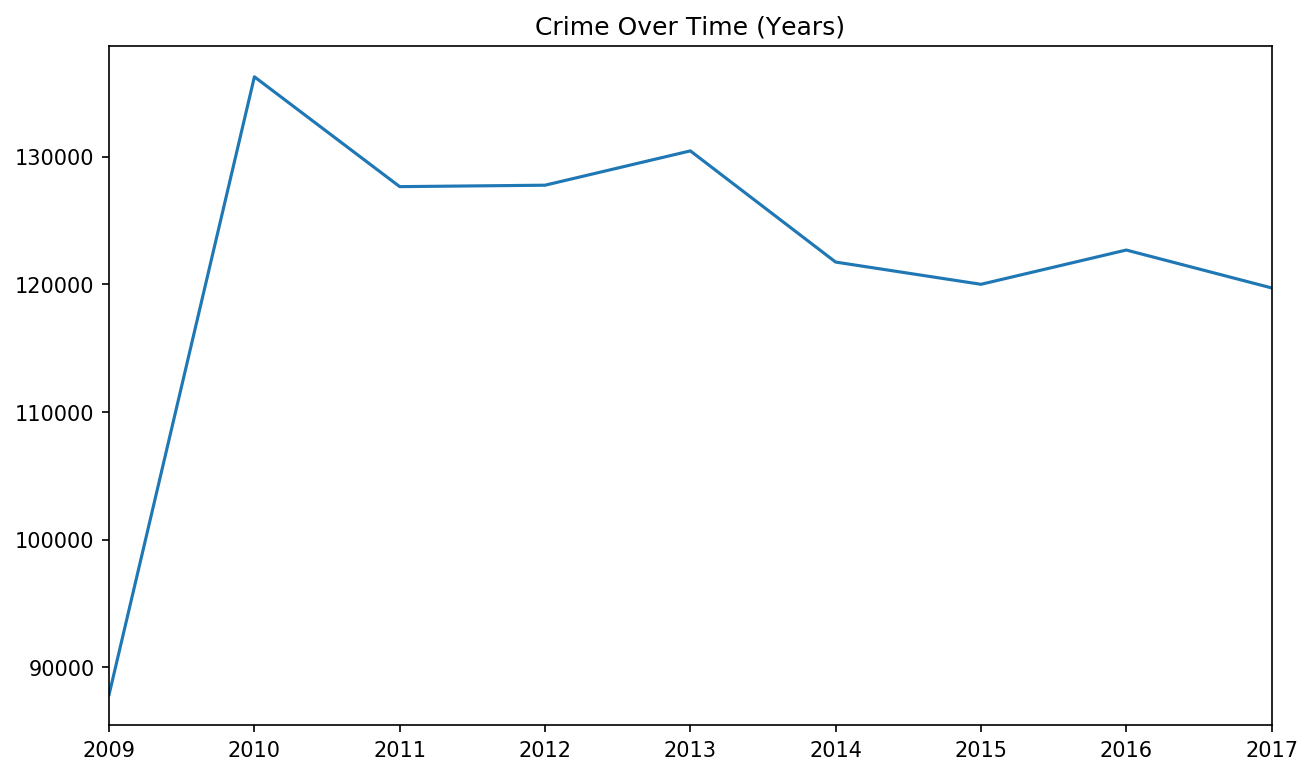

In [167]:
df.Year.value_counts().sort_index().plot.line()
print(df.Year.value_counts().sort_index())
plt.title("Crime Over Time (Years)")
plt.show()

2014_06    7613
2015_02    7918
2011_02    7968
2012_02    8578
2017_09    8677
2016_02    8788
2015_03    9264
2014_02    9451
2010_02    9561
2017_11    9642
Name: Srce_YYMM, dtype: int64
2013_07    11854
2009_11    11902
2010_07    11969
2009_12    12346
2009_09    12421
2009_06    12569
2010_05    12570
2009_10    12728
2009_07    12921
2009_08    12990
Name: Srce_YYMM, dtype: int64


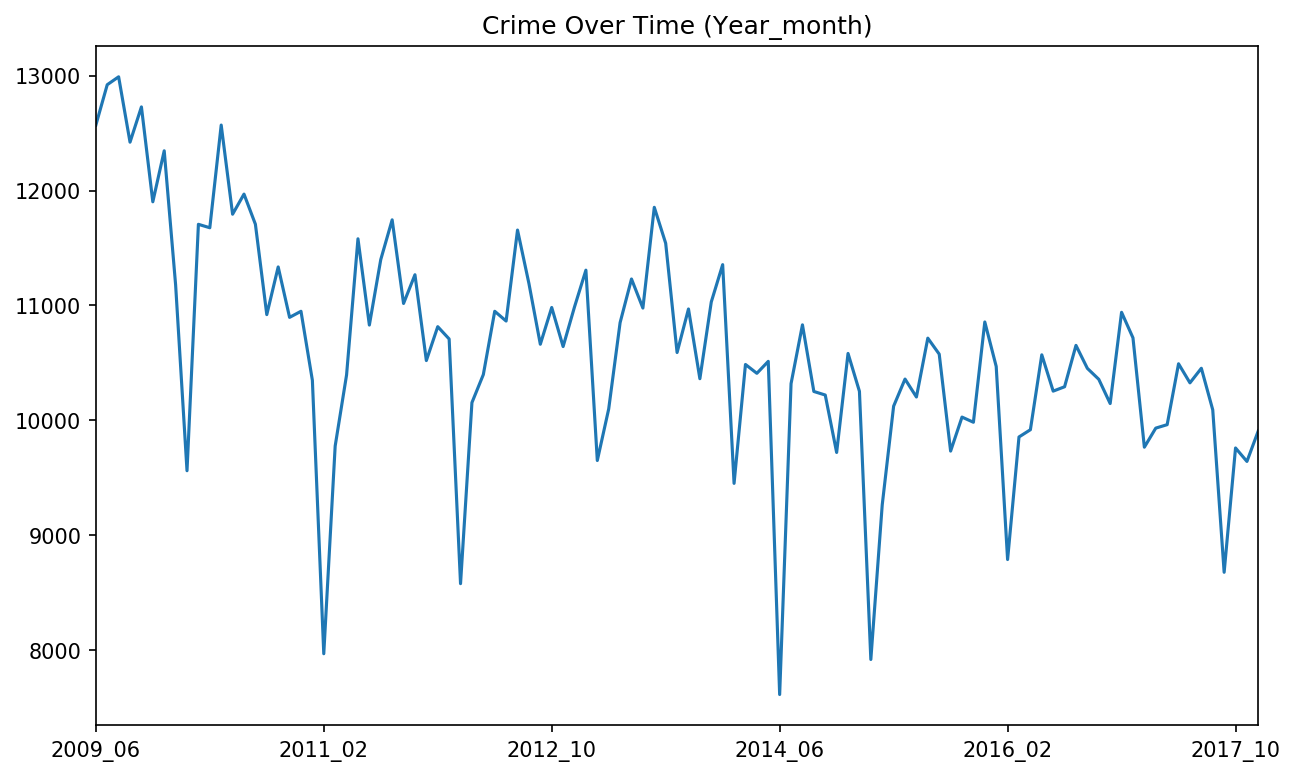

In [168]:
df.Srce_YYMM.value_counts().sort_index().plot.line()
print(df.Srce_YYMM.value_counts().sort_values().head(10))
print(df.Srce_YYMM.value_counts().sort_values().tail(10))
plt.title("Crime Over Time (Year_month)")
plt.show()

In [169]:
years = df.groupby("Year")

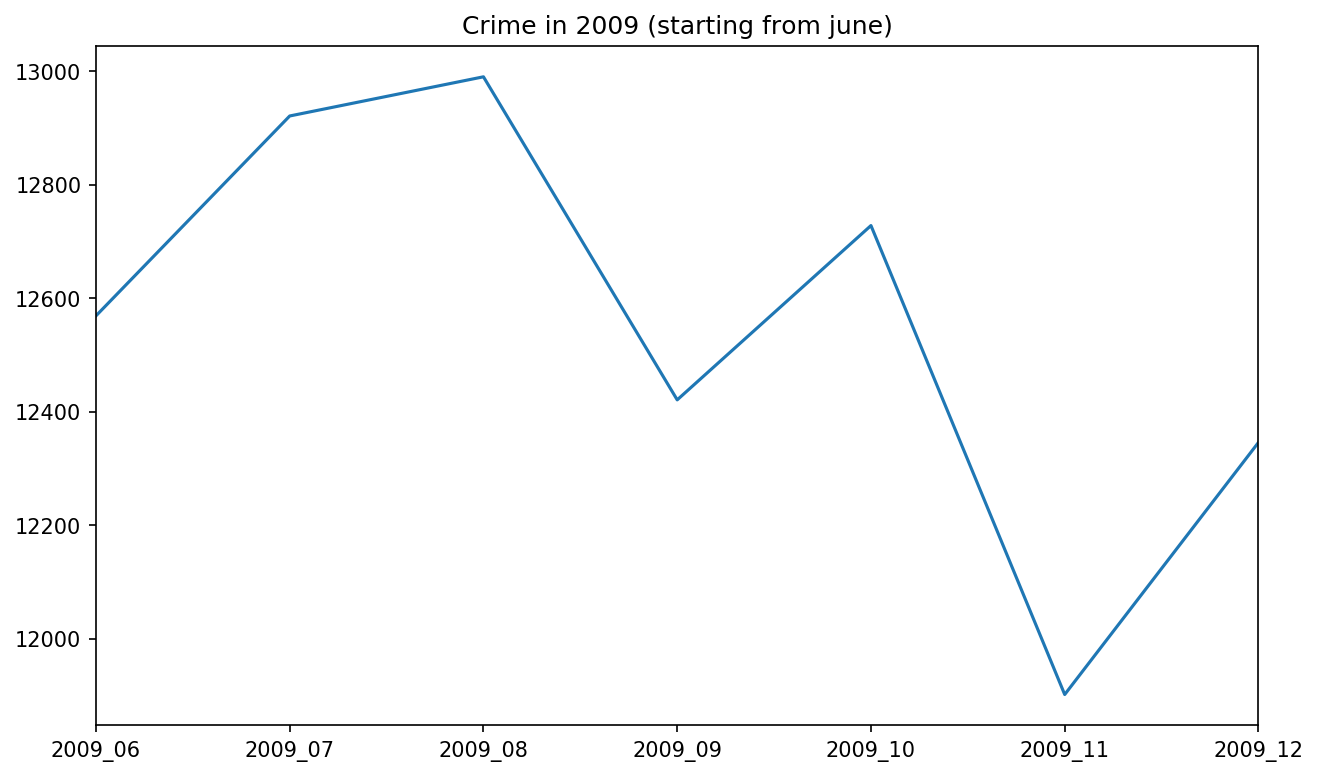

In [170]:
crime_09 = years.get_group(2009)
crime_09.Srce_YYMM.value_counts().sort_index().plot.line()
plt.title("Crime in 2009 (starting from june)")
plt.axis()
plt.show()

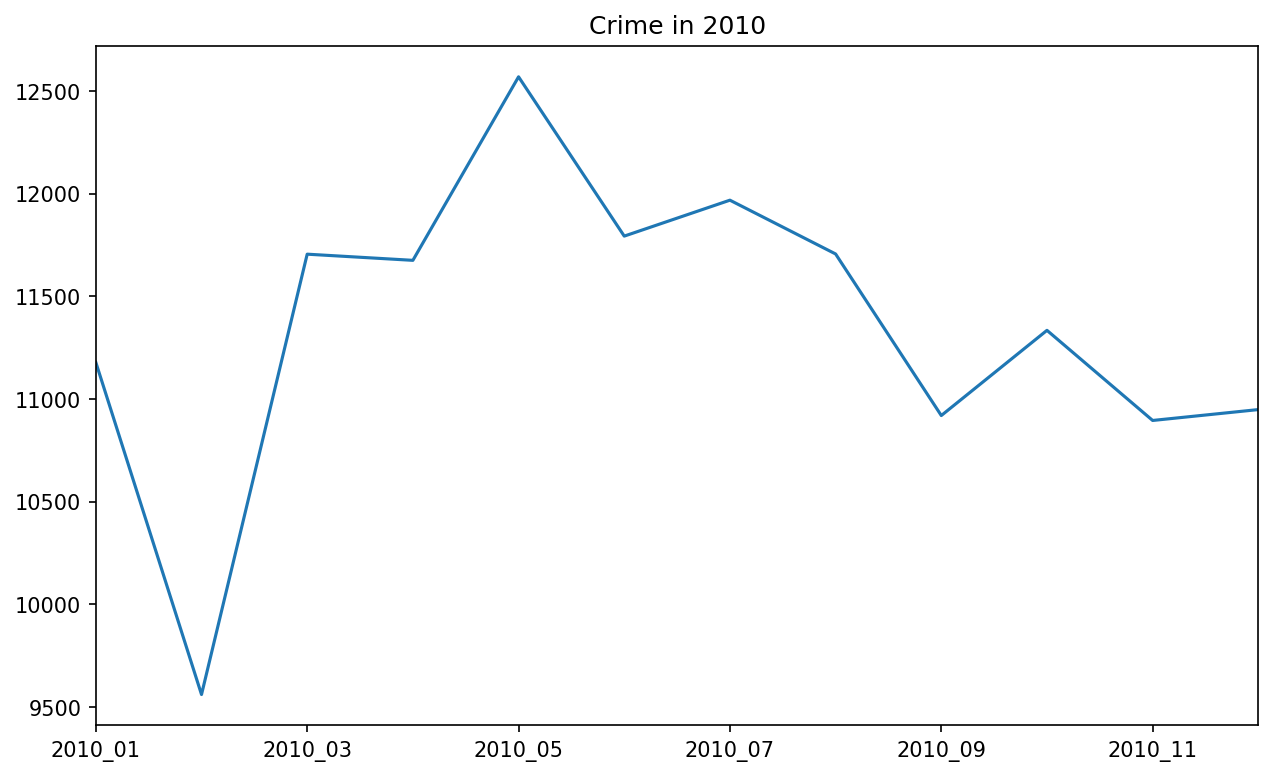

In [171]:
crime_10 = years.get_group(2010)
crime_10.Srce_YYMM.value_counts().sort_index().plot.line()
plt.title("Crime in 2010")
plt.axis()
plt.show()

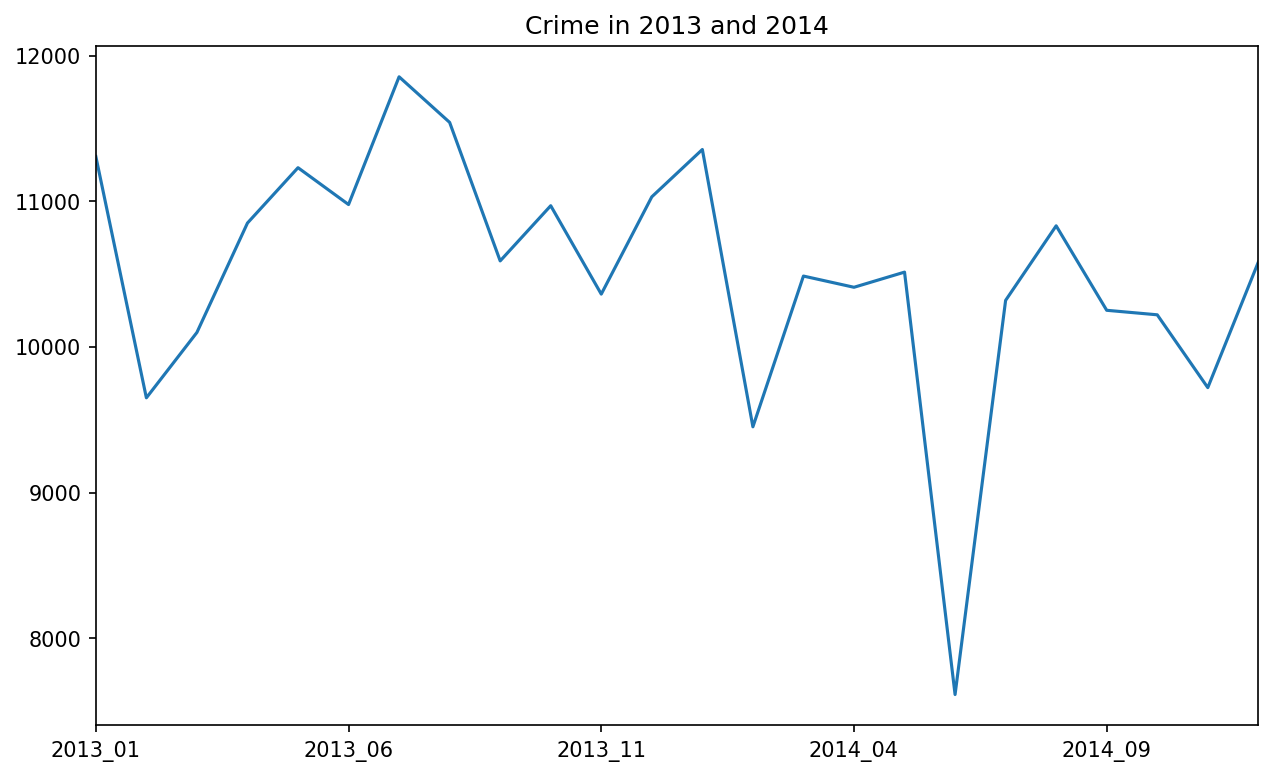

In [172]:
crime_13_14 = pd.concat([years.get_group(2013), years.get_group(2014)], axis = 0)
crime_13_14.Srce_YYMM.value_counts().sort_index().plot.line()
plt.title("Crime in 2013 and 2014")
plt.axis()
plt.show()

## General Takeaways from plotting crime vs time
2010 was the year in which we saw the most crime (excluding 2009 since the data from 2009 was incomplete). June of 2014 was the month with the lowest crime with 7613 offense, while August of 2009 saw the most crime with 12990 offenses. Overall, crime decreased in February and peaked in July of each year. The general trend shows a decrease in crime throughout the years. 

# Most Crime Heavy Divisions

Taking a closer look at the Westside, North, Central, and Northeast Divisions, since they had the most number of crimes

In [173]:
gb = df.groupby("Police_Division")

## Westside Division

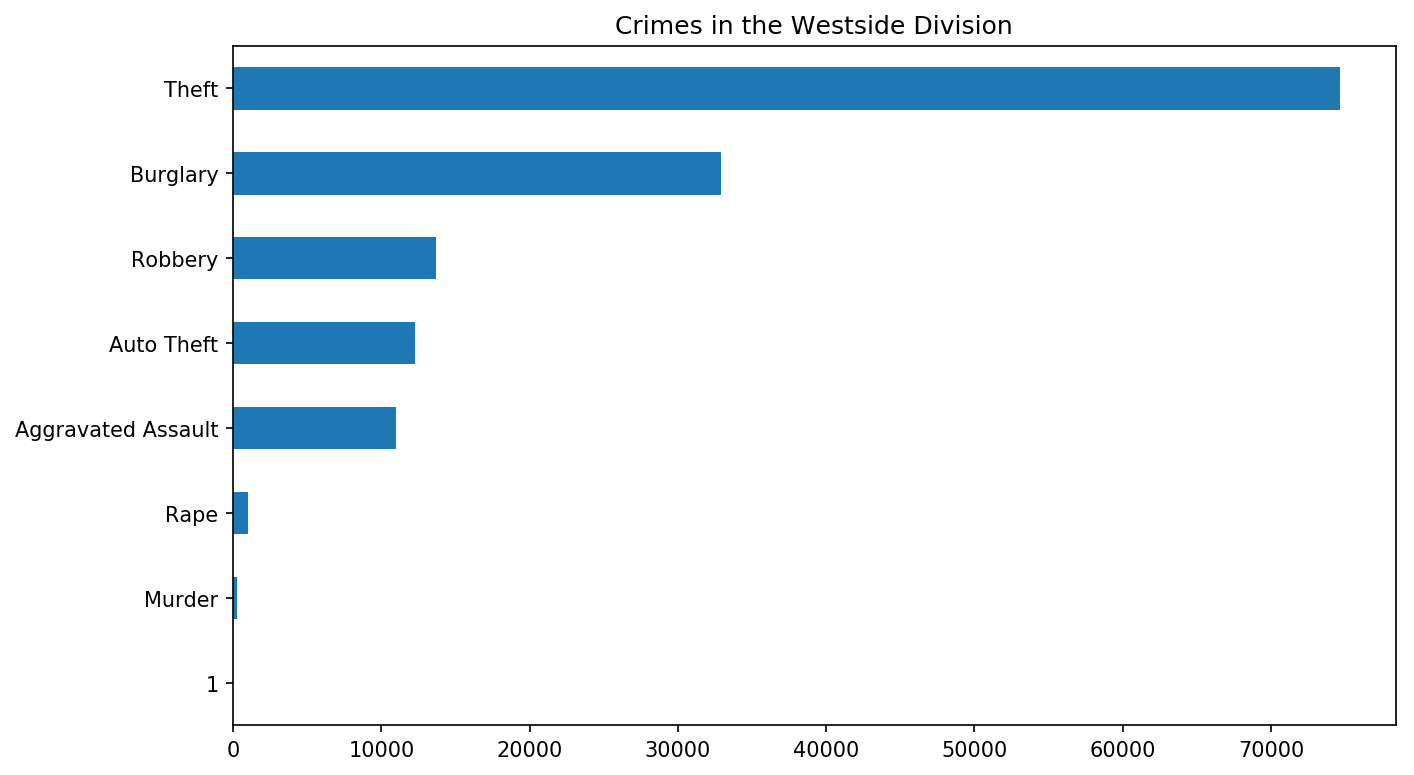

In [174]:
westside = gb.get_group("Westside Division")
westside.Offense_Type.value_counts().sort_values(ascending=True).plot.barh()
plt.title("Crimes in the Westside Division");

Text(0.5,1,'Crimes in Westside over time')

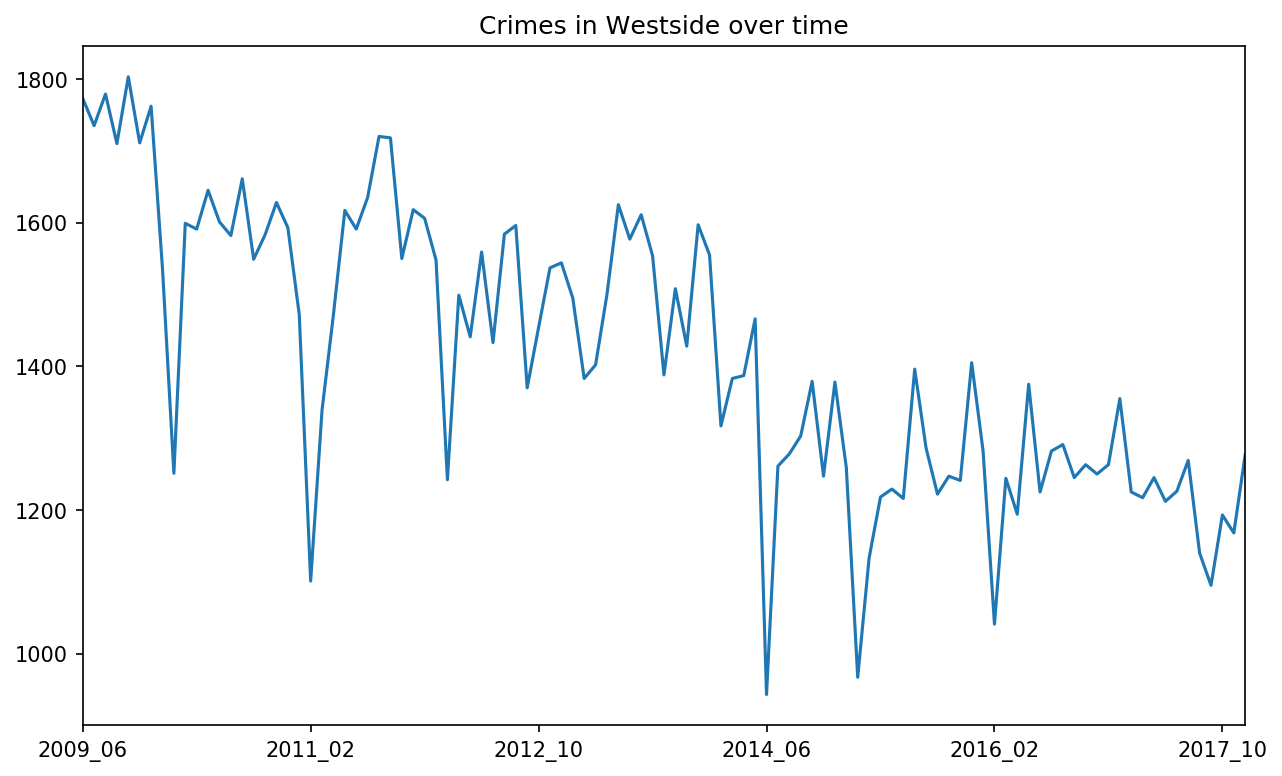

In [175]:
westside.Srce_YYMM.value_counts().sort_index().plot.line()
plt.title("Crimes in Westside over time")

Text(0.5,1,'Top 10 Location of Crimes in the Westside Division')

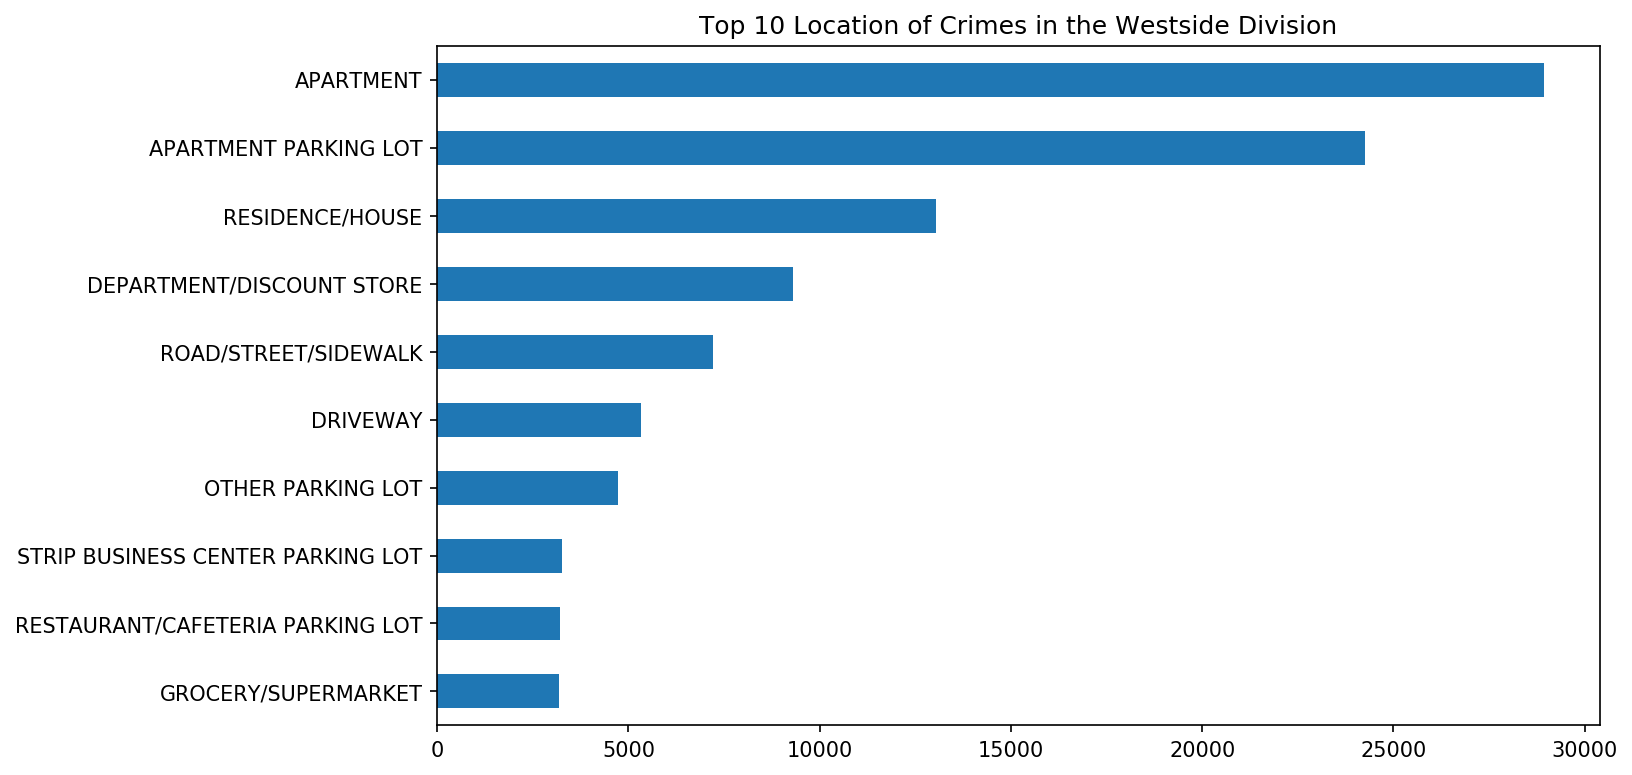

In [176]:
westside.Location_Desc.value_counts().sort_values(ascending=True).tail(10).plot.barh()
plt.title("Top 10 Location of Crimes in the Westside Division")

## North Division

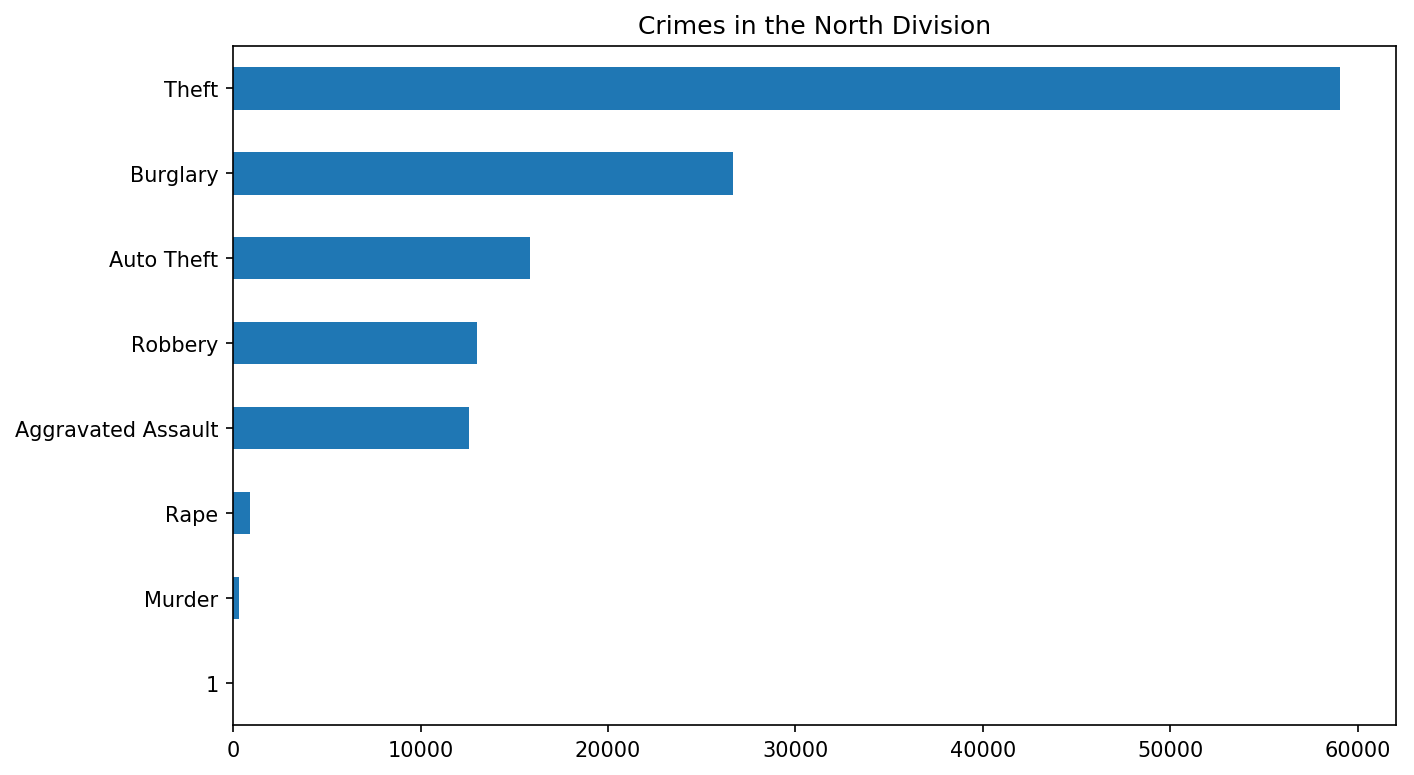

In [177]:
north = gb.get_group("North Division")
north.Offense_Type.value_counts().sort_values(ascending=True).plot.barh()
plt.title("Crimes in the North Division");

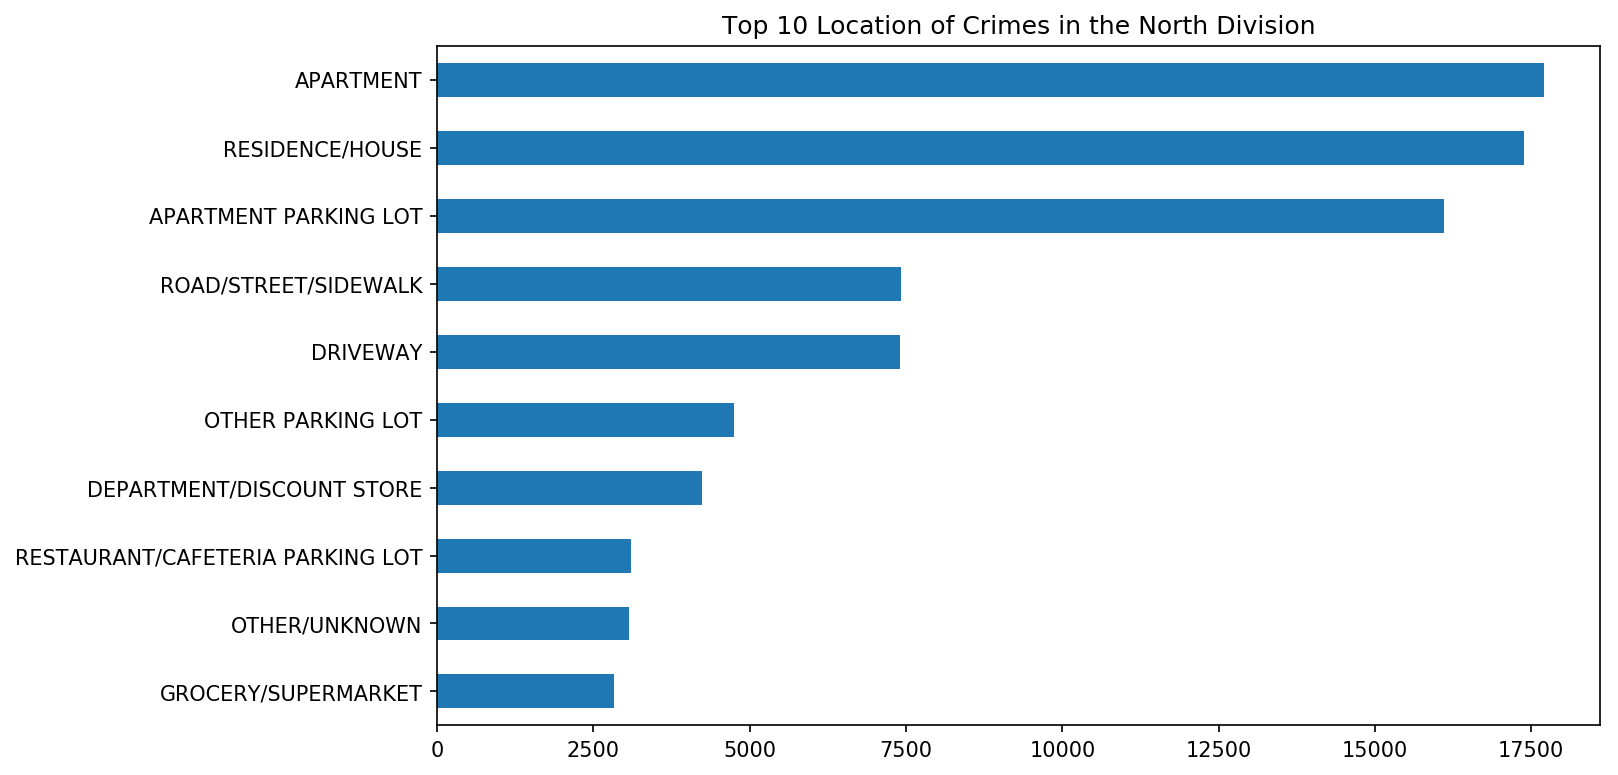

In [178]:
north.Location_Desc.value_counts().sort_values(ascending=True).tail(10).plot.barh()
plt.title("Top 10 Location of Crimes in the North Division");

## Central Division

Text(0,0.5,'Type of Crime')

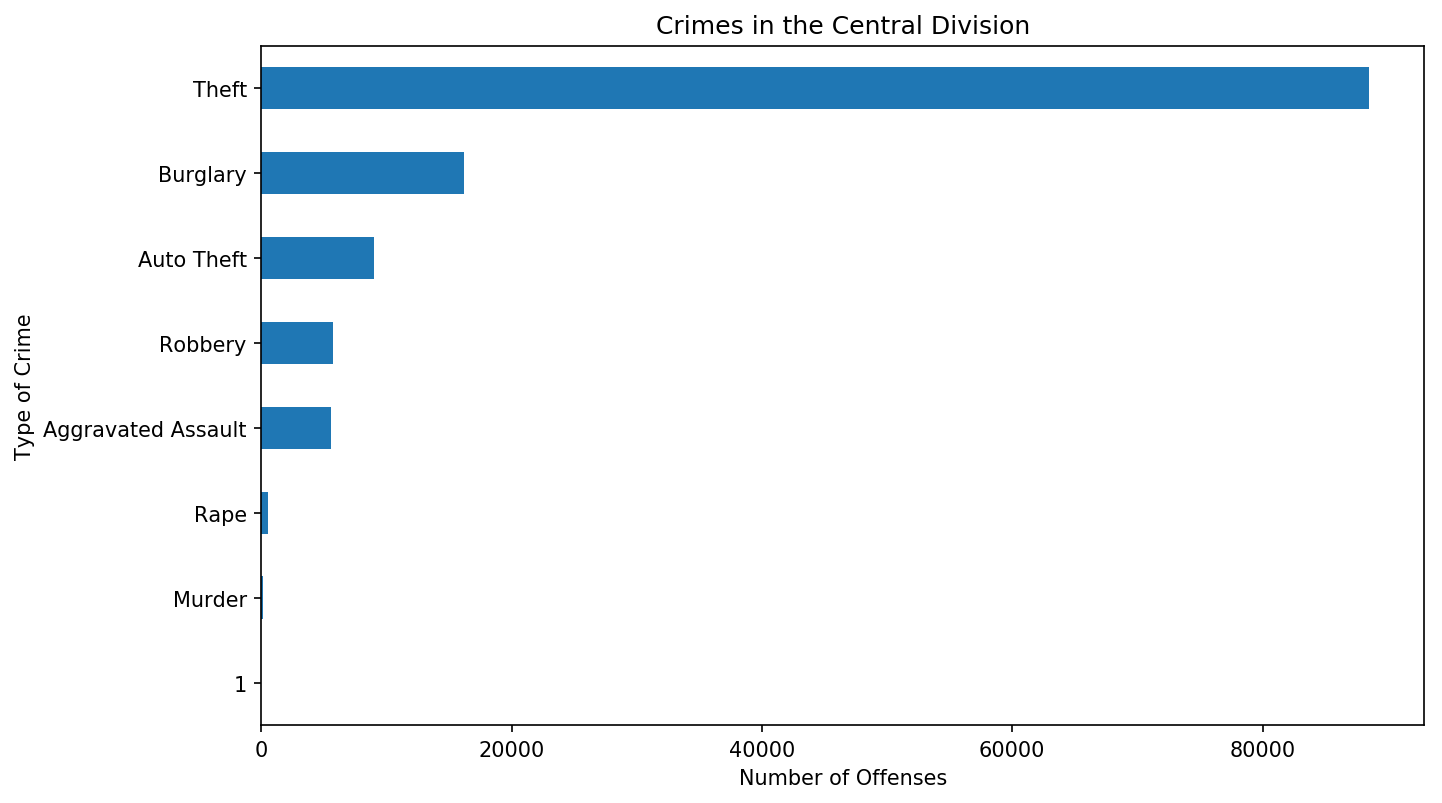

In [231]:
central = gb.get_group("Central Division")
central.Offense_Type.value_counts().sort_values(ascending=True).plot.barh()
plt.title("Crimes in the Central Division");
plt.xlabel("Number of Offenses")
plt.ylabel("Type of Crime")

## Northeast Division

Like the other divisions, theft and buglary are the most common types of crimes. Aggravated Assault is the third most common type of crime, which is unusual compared to the other divisions.

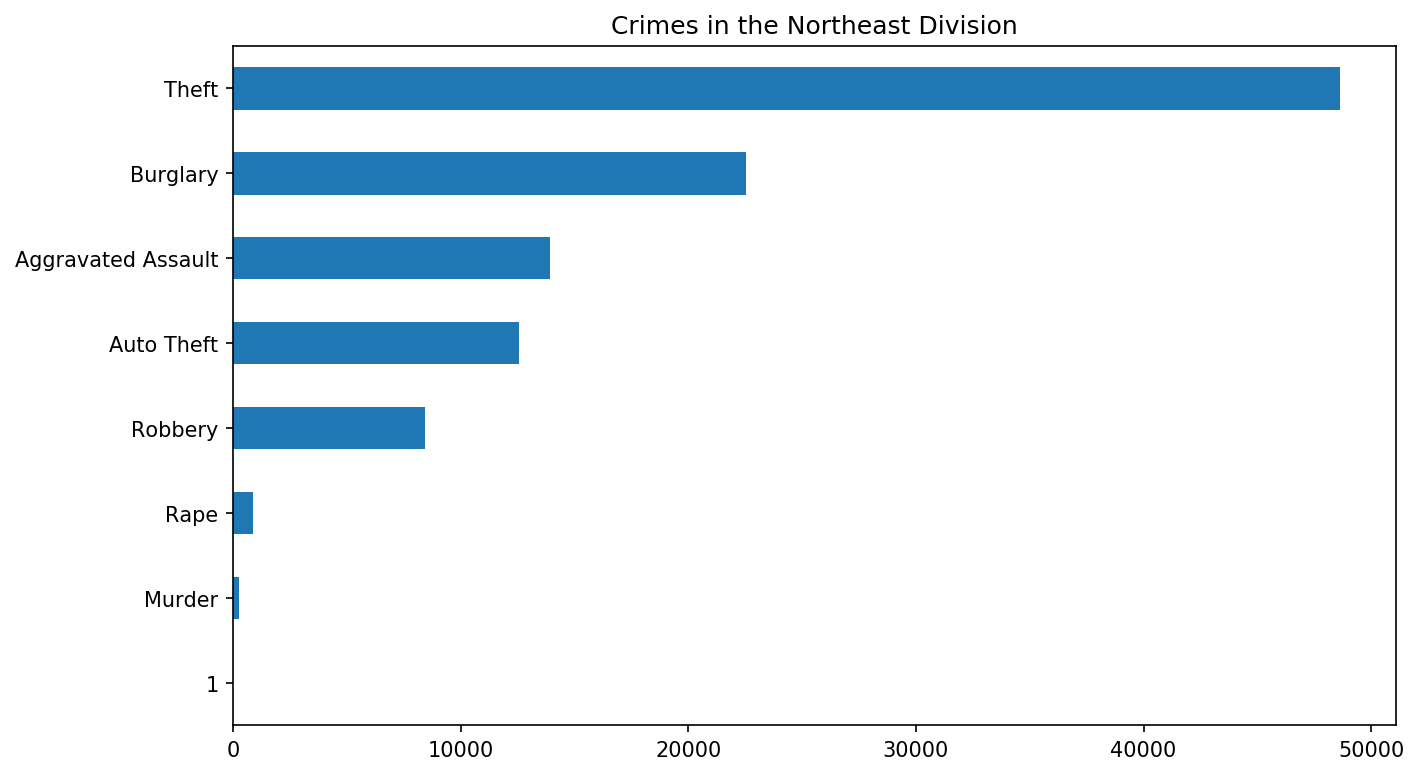

In [180]:
northeast = gb.get_group("Northeast Division")
northeast.Offense_Type.value_counts().sort_values(ascending=True).plot.barh()
plt.title("Crimes in the Northeast Division");

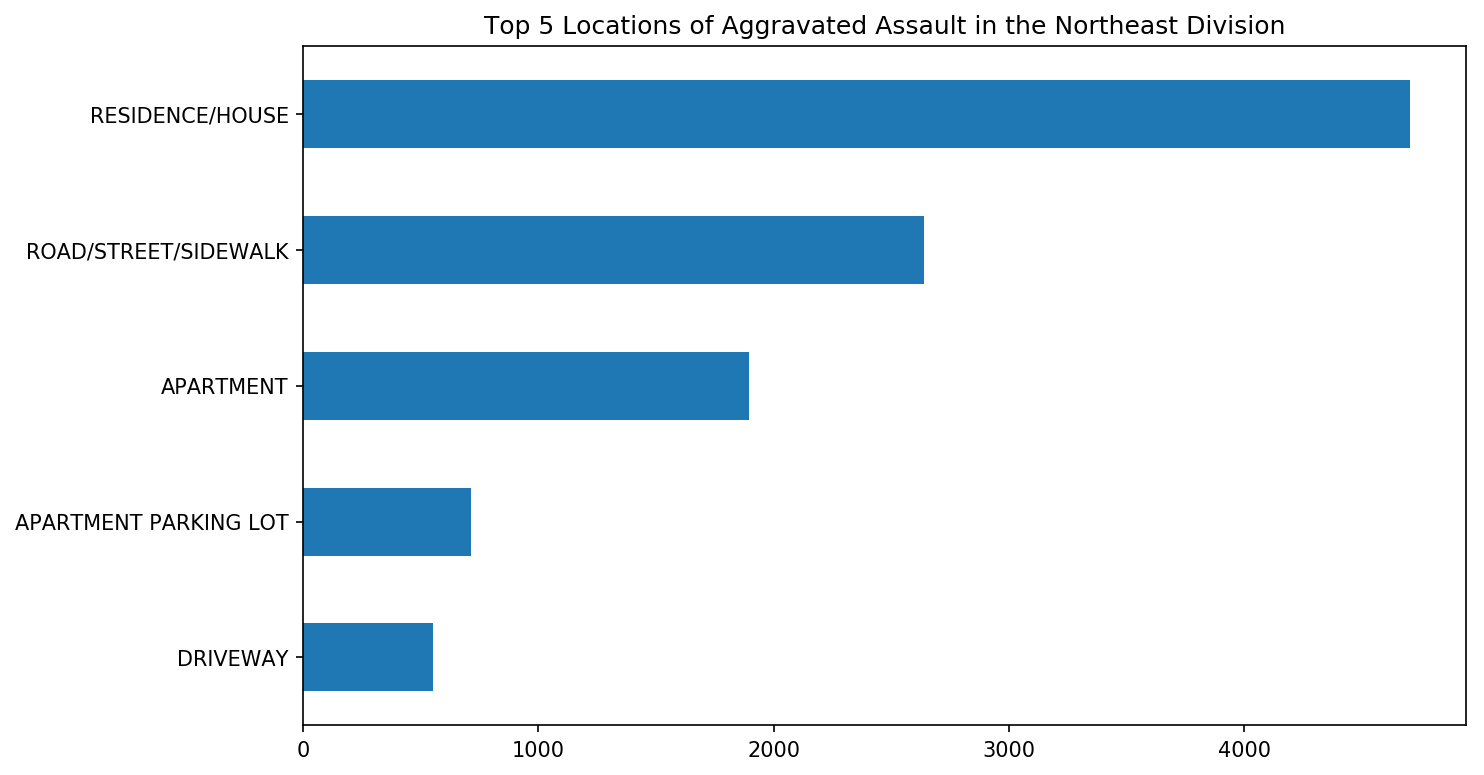

In [181]:
ne_locations = northeast.groupby("Offense_Type")
ne_aa = ne_locations.get_group("Aggravated Assault")
ne_aa.Location_Desc.value_counts().sort_values(ascending=True).tail(5).plot.barh()
plt.title("Top 5 Locations of Aggravated Assault in the Northeast Division")
plt.show()

# Divisions with most Theft

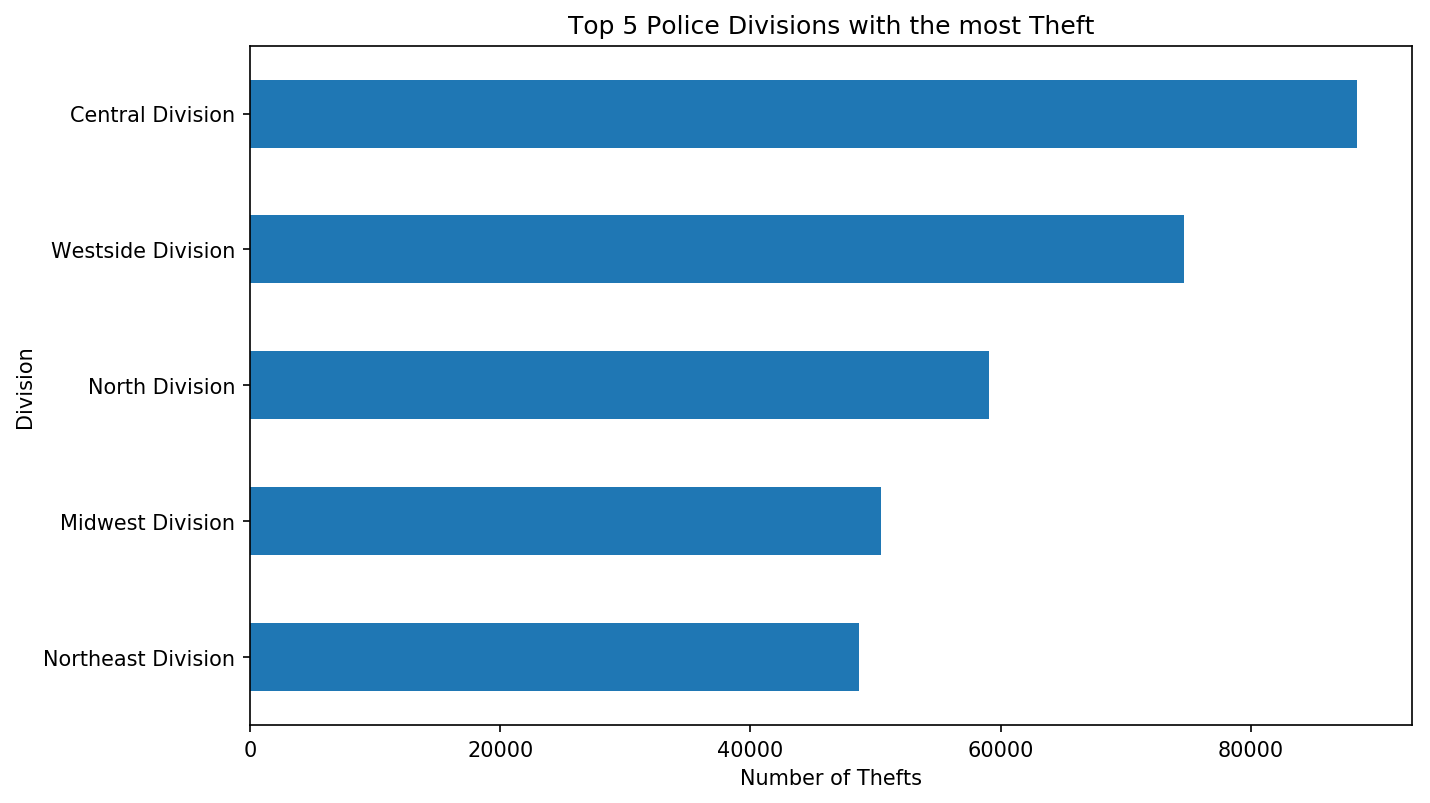

In [227]:
offense_groups = df.groupby("Offense_Type")
theft = offense_groups.get_group("Theft")
theft.Police_Division.value_counts().sort_values(ascending=True).tail(5).plot.barh()
plt.title("Top 5 Police Divisions with the most Theft")
plt.xlabel("Number of Thefts")
plt.ylabel("Division")
plt.show()

18    5759
19    5442
22    5439
20    5255
21    5012
12    4958
0     4937
17    4902
23    4381
14    4372
15    4360
13    4283
16    4183
11    4041
10    3865
9     3722
8     3712
7     2597
1     2025
2     1674
6     1405
3      921
5      632
4      597
24       1
Name: Hour, dtype: int64


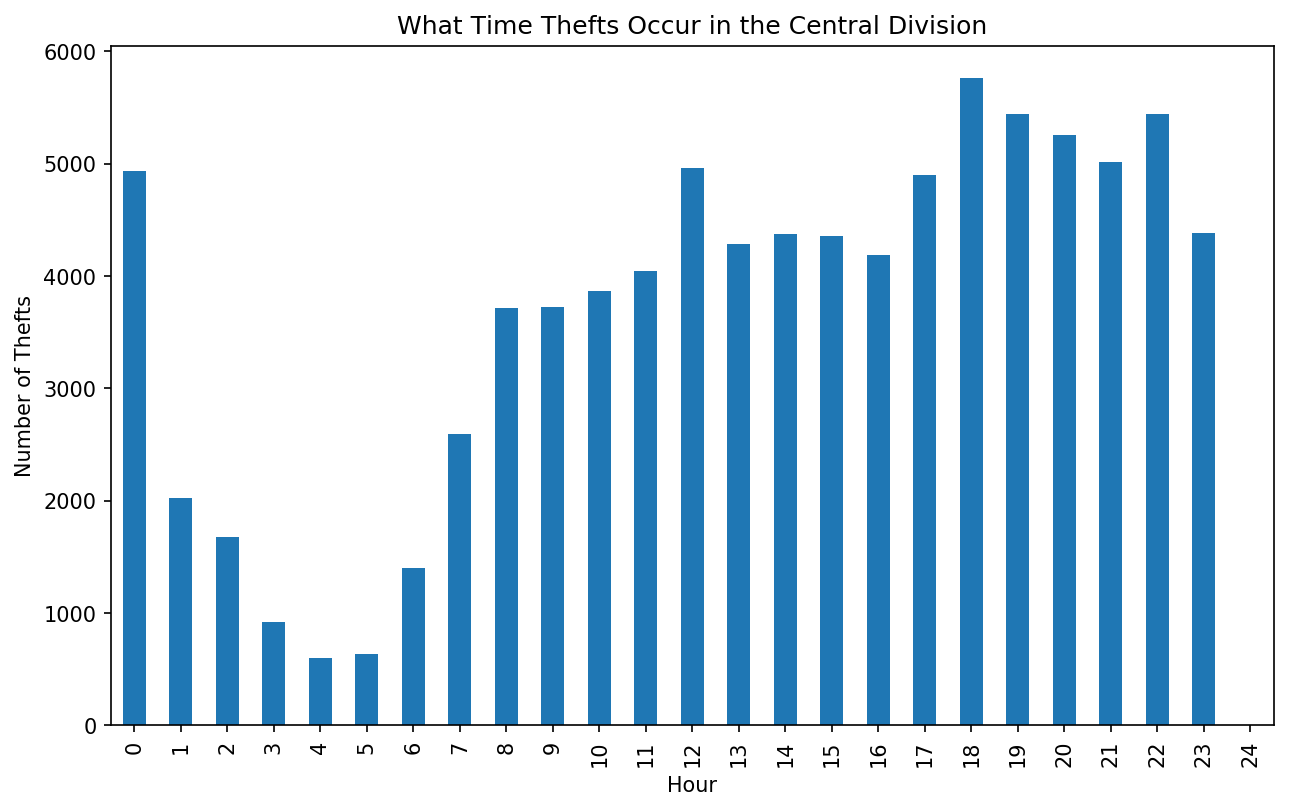

In [228]:
division_thefts = theft.groupby("Police_Division")
central_thefts = division_thefts.get_group("Central Division")
print(central_thefts.Hour.value_counts().sort_values(ascending = False))
central_thefts.Hour.value_counts().sort_index().plot.bar()
plt.title("What Time Thefts Occur in the Central Division")
plt.xlabel("Hour")
plt.ylabel("Number of Thefts")
plt.show()

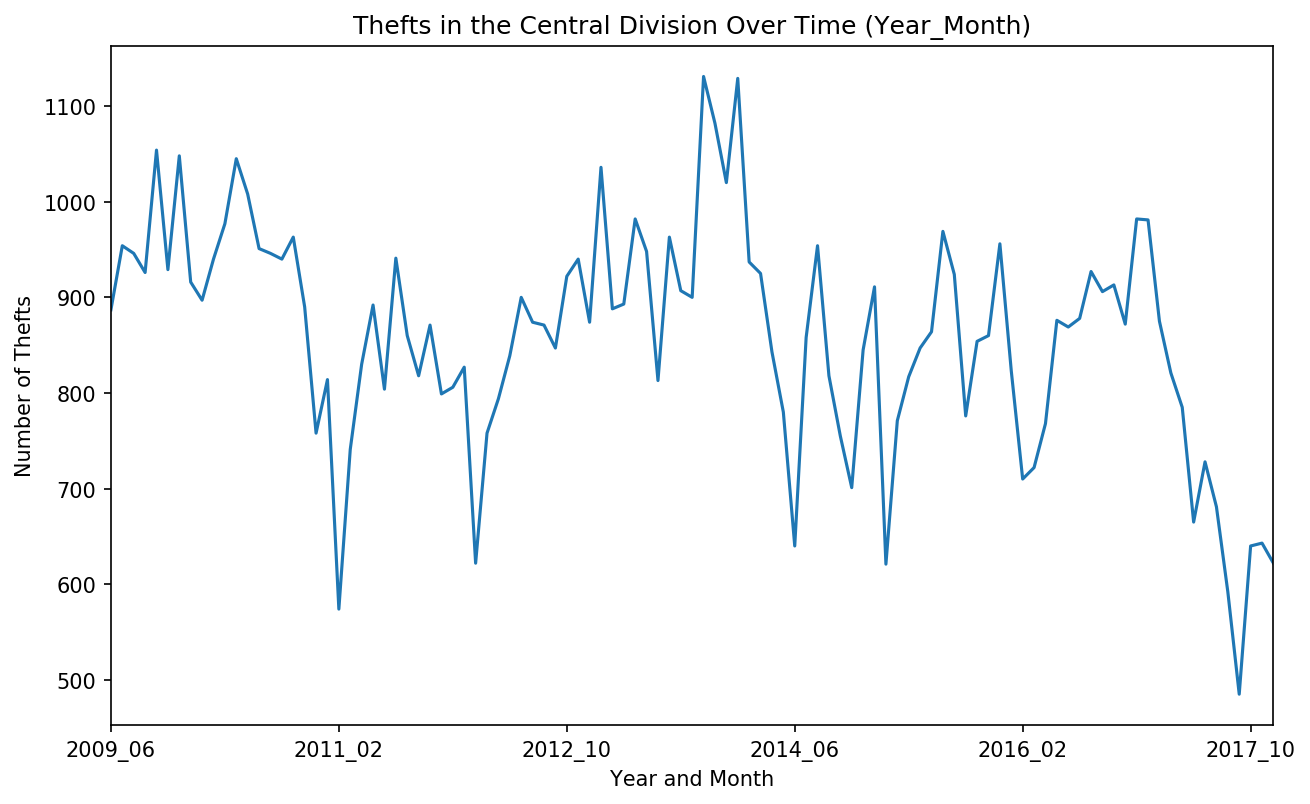

In [229]:
central_thefts.Srce_YYMM.value_counts().sort_index().plot.line()
plt.title("Thefts in the Central Division Over Time (Year_Month)")
plt.xlabel("Year and Month")
plt.ylabel("Number of Thefts")
plt.show()

In [190]:
central_thefts.Srce_YYMM.value_counts().sort_values().head(10)

2017_09    485
2011_02    574
2017_08    592
2015_02    621
2012_02    622
2017_12    622
2017_10    640
2014_06    640
2017_11    643
2017_05    665
Name: Srce_YYMM, dtype: int64

In [191]:
central_thefts.Srce_YYMM.value_counts().sort_values().tail(10)

2016_12     982
2010_06    1008
2013_12    1020
2013_01    1036
2010_05    1045
2009_12    1048
2009_10    1054
2013_11    1082
2014_01    1129
2013_10    1131
Name: Srce_YYMM, dtype: int64

In [192]:
central_thefts.Month.value_counts()

10    8103
7     8069
8     7927
12    7911
11    7716
6     7513
1     7437
9     7416
5     6892
4     6796
3     6571
2     6124
Name: Month, dtype: int64

Text(0,0.5,'Number of Thefts')

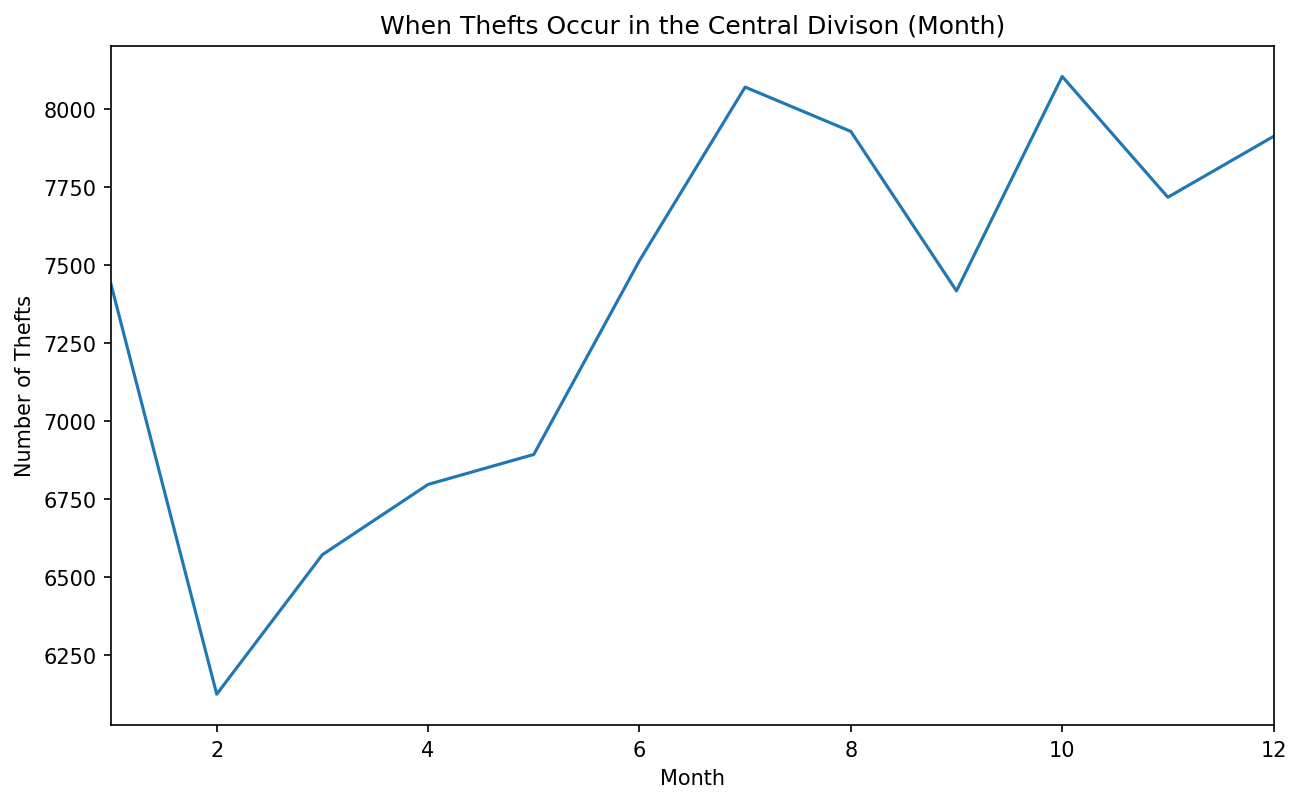

In [198]:
central_thefts.Month.value_counts().sort_index().plot.line()
plt.title("When Thefts Occur in the Central Divison (Month)")
plt.xlabel('Month')
plt.ylabel('Number of Thefts')

Text(0,0.5,'Location Description')

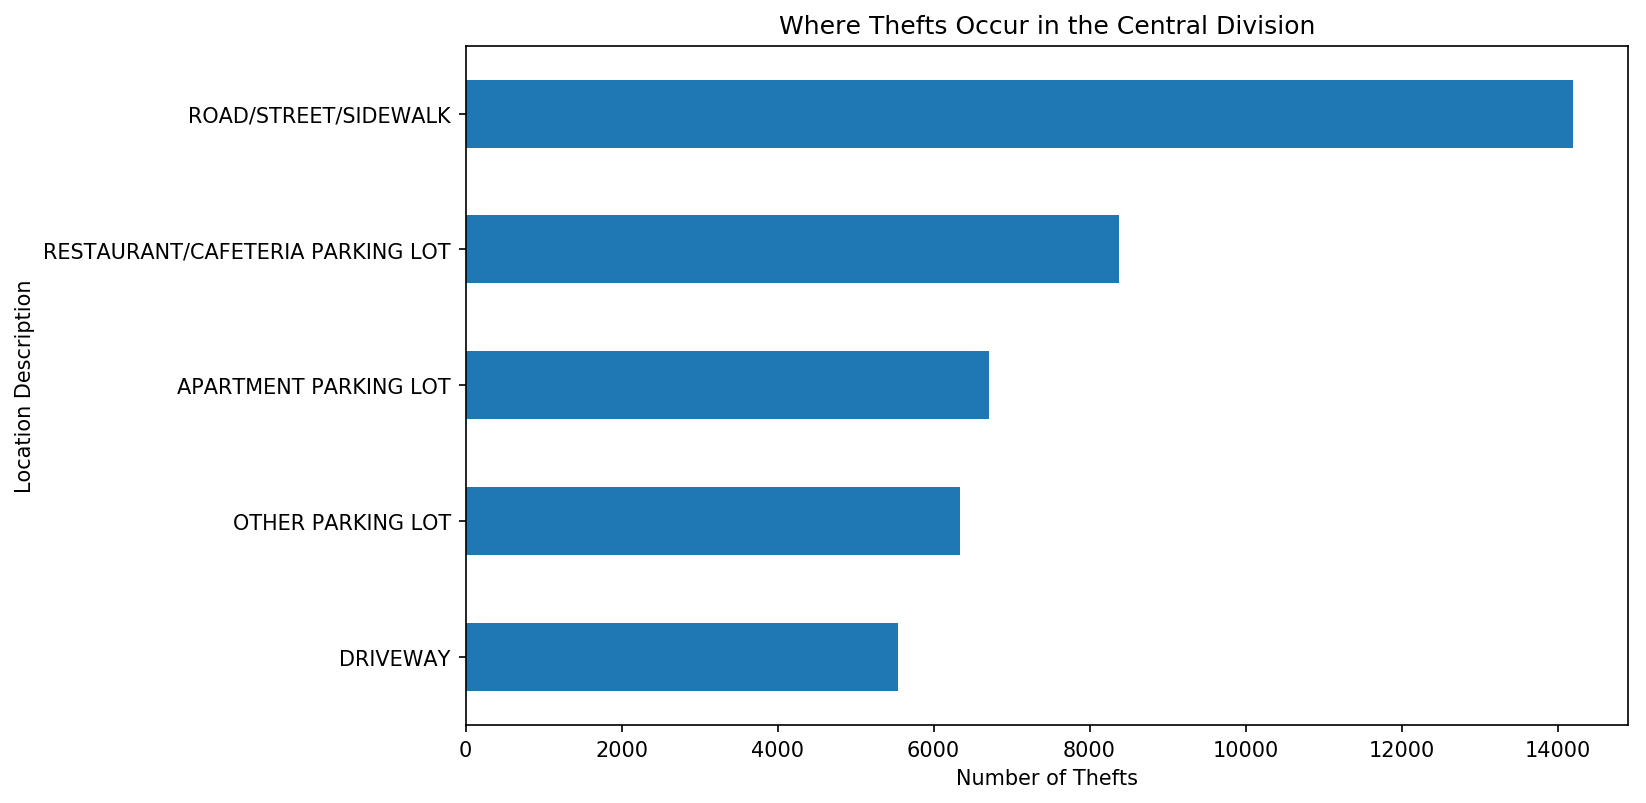

In [203]:
central_thefts.Location_Desc.value_counts().sort_values(ascending=True).tail(5).plot.barh()
plt.title("Where Thefts Occur in the Central Division")
plt.xlabel("Number of Thefts")
plt.ylabel("Location Description")

18    5759
19    5442
22    5439
20    5255
21    5012
12    4958
0     4937
17    4902
23    4381
14    4372
15    4360
13    4283
16    4183
11    4041
10    3865
9     3722
8     3712
7     2597
1     2025
2     1674
6     1405
3      921
5      632
4      597
24       1
Name: Hour, dtype: int64


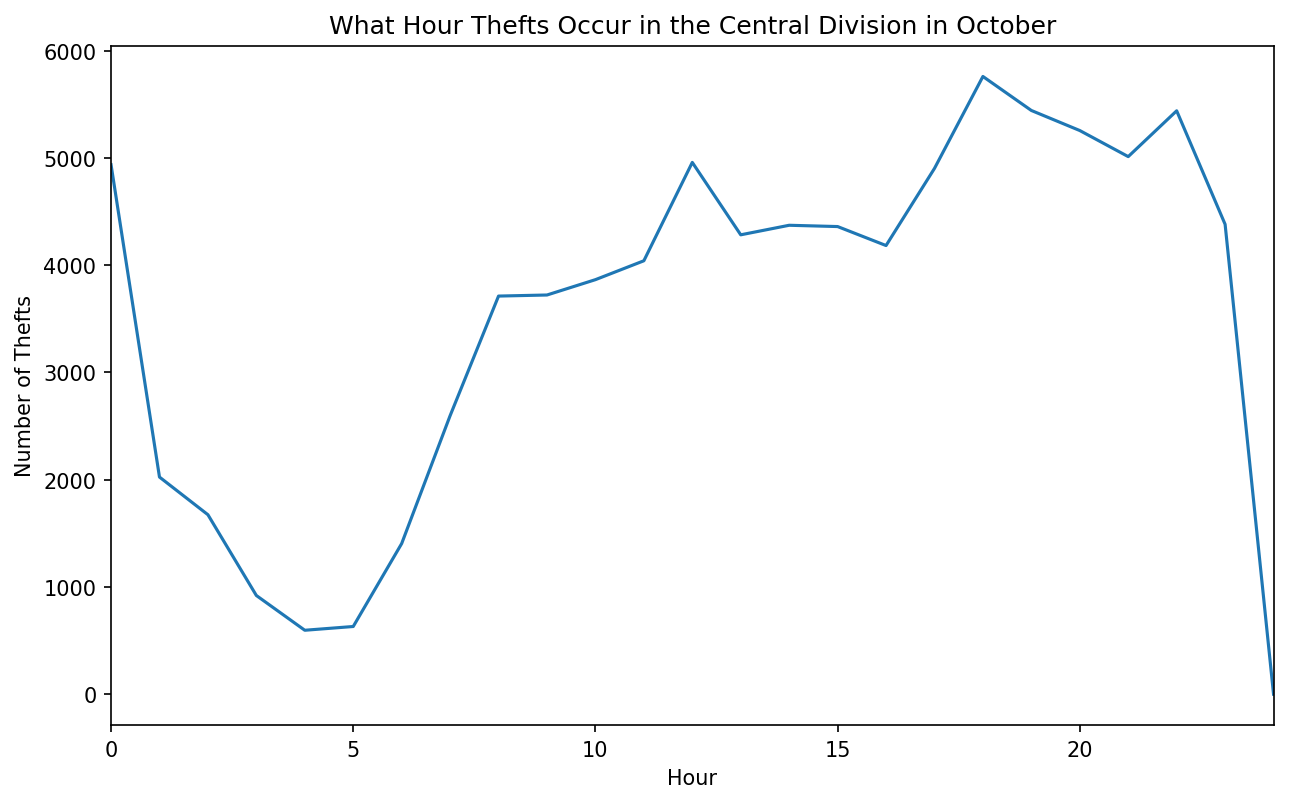

In [230]:
central_thefts_months = central_thefts.groupby("Month")
central_thefts_october = central_thefts_months.get_group(10)
print(central_thefts.Hour.value_counts().sort_values(ascending = False))
central_thefts.Hour.value_counts().sort_index().plot.line()
plt.title("What Hour Thefts Occur in the Central Division in October")
plt.xlabel("Hour")
plt.ylabel("Number of Thefts")
plt.show()

# Divisions with the most Burglary

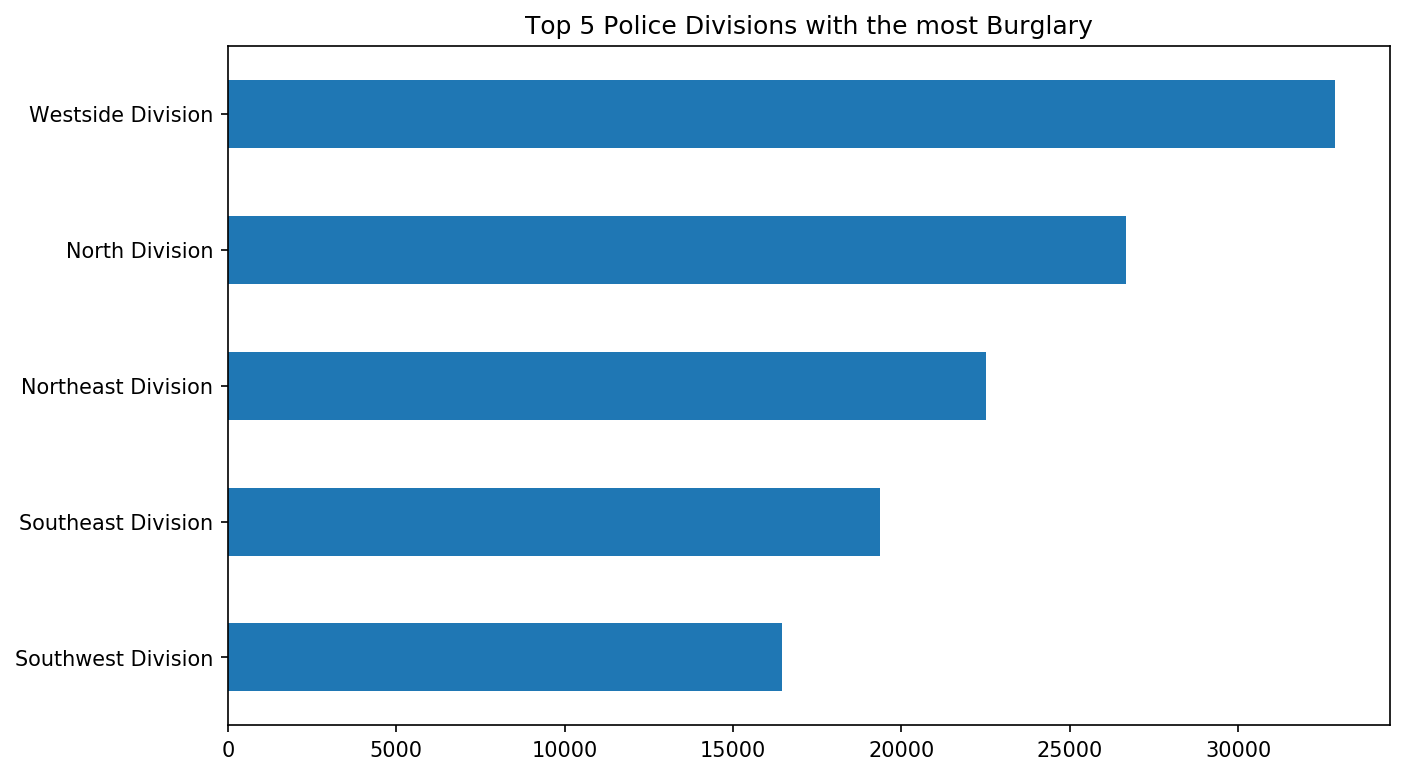

In [186]:
burglary = offense_groups.get_group("Burglary")
burglary.Police_Division.value_counts().sort_values(ascending=True).tail(5).plot.barh()
plt.title("Top 5 Police Divisions with the most Burglary")
plt.show()

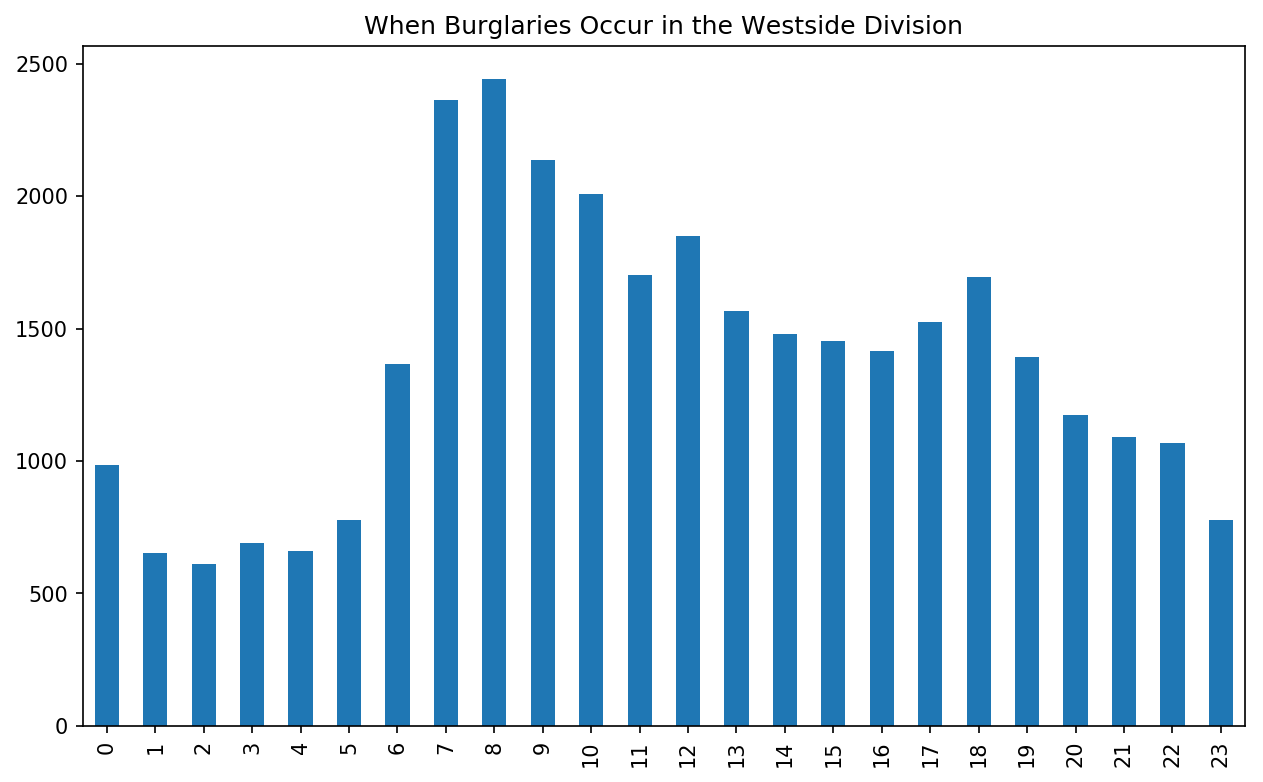

In [187]:
division_burglary = burglary.groupby("Police_Division")
westside_burglary = division_burglary.get_group("Westside Division")
westside_burglary.Hour.value_counts().sort_index().plot.bar()
plt.title("When Burglaries Occur in the Westside Division")
plt.show()

# Burglary over time

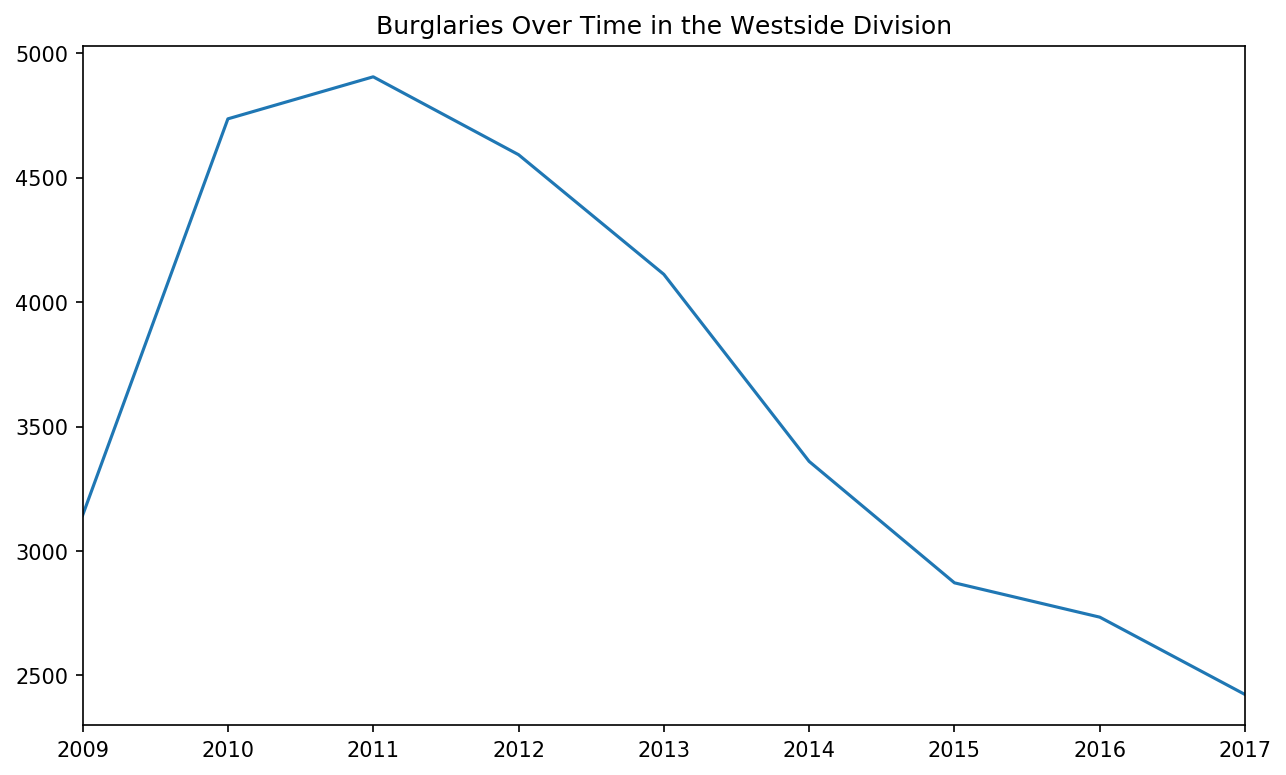

In [188]:
westside_burglary.Year.value_counts().sort_index().plot.line()
plt.title("Burglaries Over Time in the Westside Division")
plt.show()